In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving PredictionData.xlsx to PredictionData.xlsx


In [ ]:
file_path = r"/content/PredictionData.xlsx"

In [ ]:
sheet_name = 'vw_ChurnData'

In [ ]:
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
print(data.head())

  Customer_ID  Gender  Age Married            State  Number_of_Referrals  \
0   11340-JAM  Female   21      No  Jammu & Kashmir                    8   
1   11348-MAH  Female   46      No      Maharashtra                   11   
2   11359-AND  Female   28     Yes   Andhra Pradesh                    3   
3   11370-TAM  Female   21      No       Tamil Nadu                   15   
4   11392-JAM  Female   39     Yes  Jammu & Kashmir                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7        NaN           Yes             No  ...   
1                19     Deal 3           Yes             No  ...   
2                 6     Deal 4           Yes             No  ...   
3                10     Deal 4           Yes             No  ...   
4                 1     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      19.950001    219.500000           0.0   
1  B

In [ ]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [ ]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


In [ ]:
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [ ]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [ ]:
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[806  48]
 [135 213]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       854
           1       0.82      0.61      0.70       348

    accuracy                           0.85      1202
   macro avg       0.84      0.78      0.80      1202
weighted avg       0.84      0.85      0.84      1202



In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


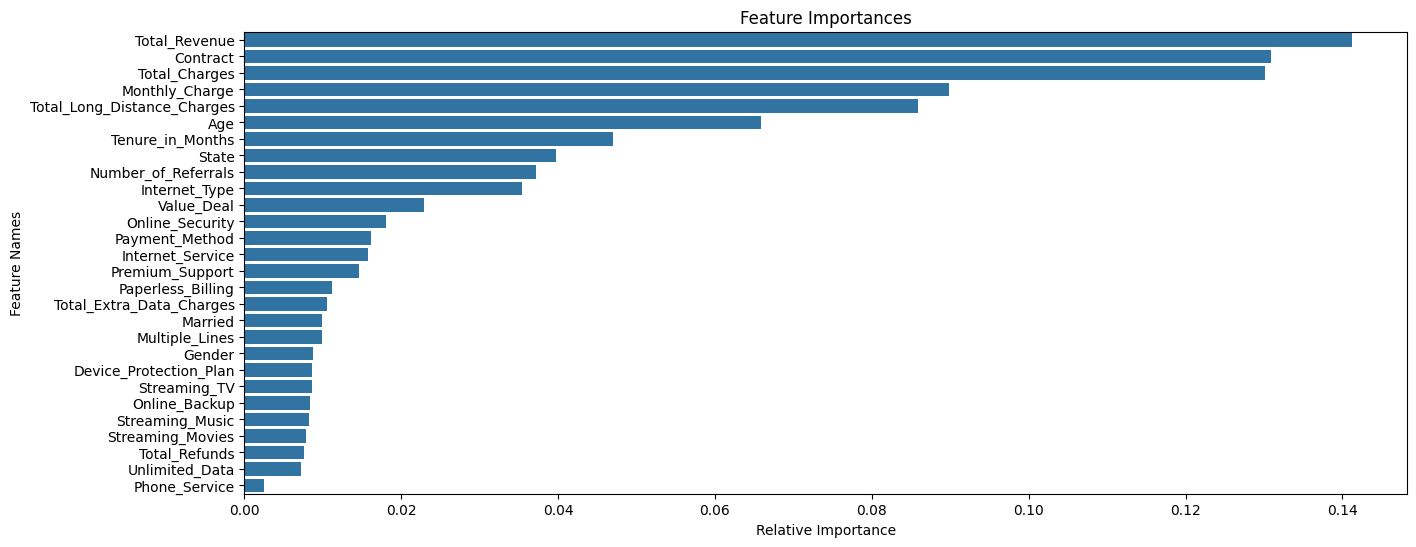

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [ ]:
file_path

'/content/PredictionData.xlsx'

In [ ]:
sheet_name = 'vw_JoinData'

In [ ]:
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
print(new_data.head())

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

In [ ]:
original_data = new_data.copy()

In [ ]:
customer_ids = new_data['Customer_ID']

In [ ]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [ ]:
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


In [ ]:
new_predictions = rf_model.predict(new_data)

In [ ]:
original_data['Customer_Status_Predicted'] = new_predictions

In [ ]:
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [ ]:
original_data.to_csv(r"C:\Predictions.csv", index=False)